In [ ]:
!pip install keras --upgrade
!pip install pandas --upgrade
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Libraries

In [ ]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Spotify/Spotify_API_csv/SpotifyAPI_AllGenres.csv')
#print(data)

# Train Test Split
train, test = sk.model_selection.train_test_split(data, test_size=0.2)

X_train = train.drop(['hit', 'name','artist', 'Unnamed: 0', 'genre'], axis = 1)
X_test = test.drop(['hit', 'name','artist', 'Unnamed: 0', 'genre'], axis = 1)
y_train = train['hit']
y_test = test['hit']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print(X_train.shape)

# Neural Network

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
1000/1000 [==============================] - 17s 10ms/step - loss: 0.4042 - accuracy: 0.8355 - precision: 0.2143 - recall: 0.0011
Epoch 2/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.3904 - accuracy: 0.8359 - precision: 0.4706 - recall: 0.0030
Epoch 3/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3833 - accuracy: 0.8364 - precision: 0.5363 - recall: 0.0183
Epoch 4/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.3778 - accuracy: 0.8369 - precision: 0.5466 - recall: 0.0335
Epoch 5/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3705 - accuracy: 0.8385 - precision: 0.5709 - recall: 0.0621
Epoch 6/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3621 - accuracy: 0.8408 - precision: 0.5958 - recall: 0.0913
Epoch 7/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.3523 - accuracy: 0.8439 - precision: 0.6078 - recall: 0.1359
Epoch 8/50
1000/1000 

# Performance + Plot Graph 

In [ ]:
predictions = model.predict(X_test_scaled)

prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

print(confusion_matrix(y_test, prediction_classes))

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

250/250 [==============================] - 1s 2ms/step
[[6366  324]
 [ 461  849]]
Accuracy: 0.90
Precision: 0.72
Recall: 0.65


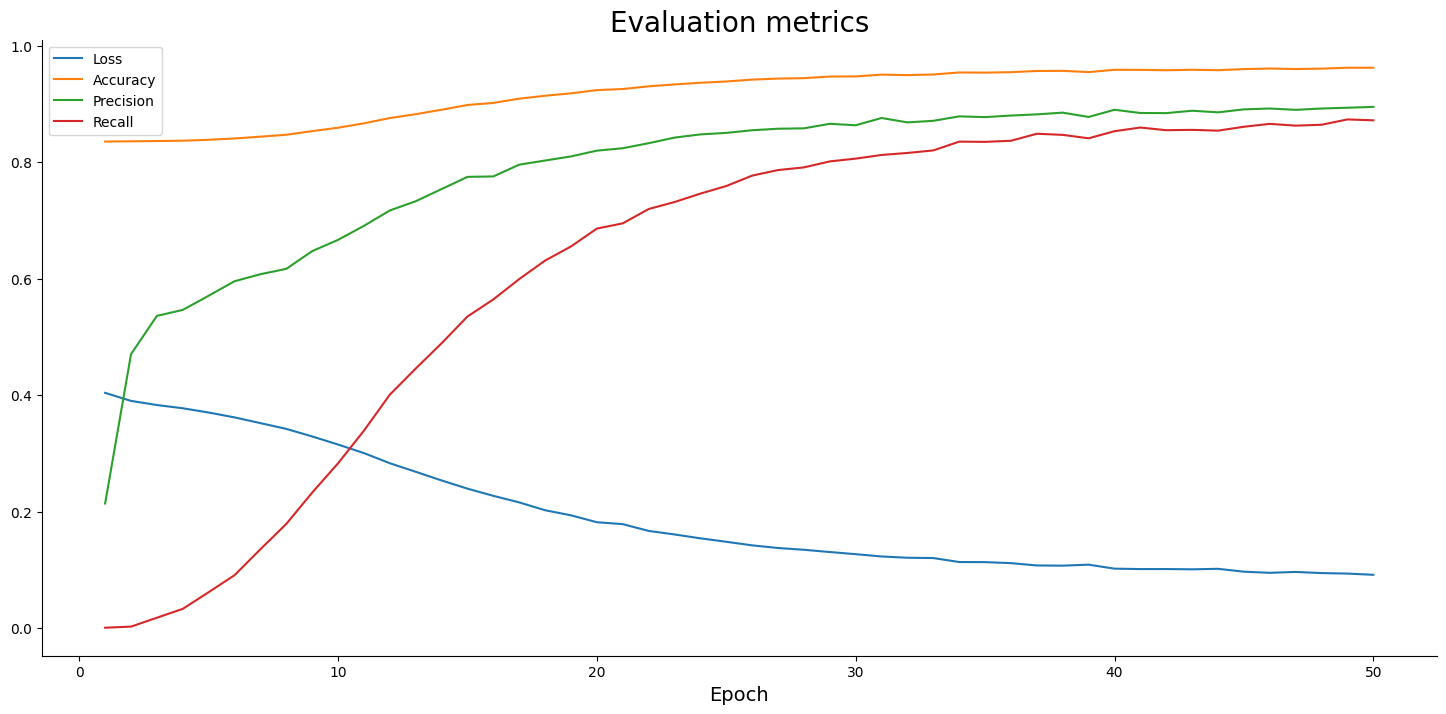

In [ ]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 51), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 51), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 51), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 51), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

# Old

In [ ]:
!pip install keras --upgrade
!pip install pandas --upgrade
!pip install tensorflow --upgrade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection
data = pd.read_csv('/content/drive/MyDrive/Spotify/SpotifyAPI_AllGenres.csv')
print(data)

       Unnamed: 0              name                   artist  genre   
0               0         MARMALADE               MACKLEMORE      2  \
1               1        NEW BUILDS           ARCHY MARSHALL      3   
2               2  MOTHER LIKE MINE           THE BAND PERRY      1   
3               3      STUCK WITH U            ARIANA GRANDE      2   
4               4            GENIUS                      SIA      2   
...           ...               ...                      ...    ...   
39995       39995            FAMOUS              ADAM DOLEAC      1   
39996       39996  BOYS 'ROUND HERE            BLAKE SHELTON      1   
39997       39997          FLY AWAY              TONES AND I      2   
39998       39998  SÍGUELO BAILANDO                    OZUNA      2   
39999       39999     LA CLEPTÓMANA  BUENA VISTA SOCIAL CLUB      3   

       danceability  energy  key  loudness  mode  speechiness  acousticness   
0             0.922   0.583    5    -4.982     1       0.0753       

In [ ]:
train, test = sk.model_selection.train_test_split(data, test_size=0.2)

In [ ]:
X_train = train.drop(['hit', 'name','artist', 'Unnamed: 0', 'genre'], axis = 1)
X_test = test.drop(['hit', 'name','artist', 'Unnamed: 0', 'genre'], axis = 1)
y_train = train['hit']
y_test = test['hit']

In [ ]:
print(X_test.shape)

(8000, 12)


In [ ]:
#X_train = np.asarray(X_train).astype('float32').reshape((-1,1))
#X_test = np.asarray(X_test).astype('float32').reshape((-1,1))
#y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
#y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_test_scaled[0])

[ 1.18090512  0.71260751 -1.19052714  1.00345681  0.75244316 -0.45276049
 -0.39468199 -0.44685843 -0.65909263  1.29878524 -0.18151865  0.16481061]


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=50)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

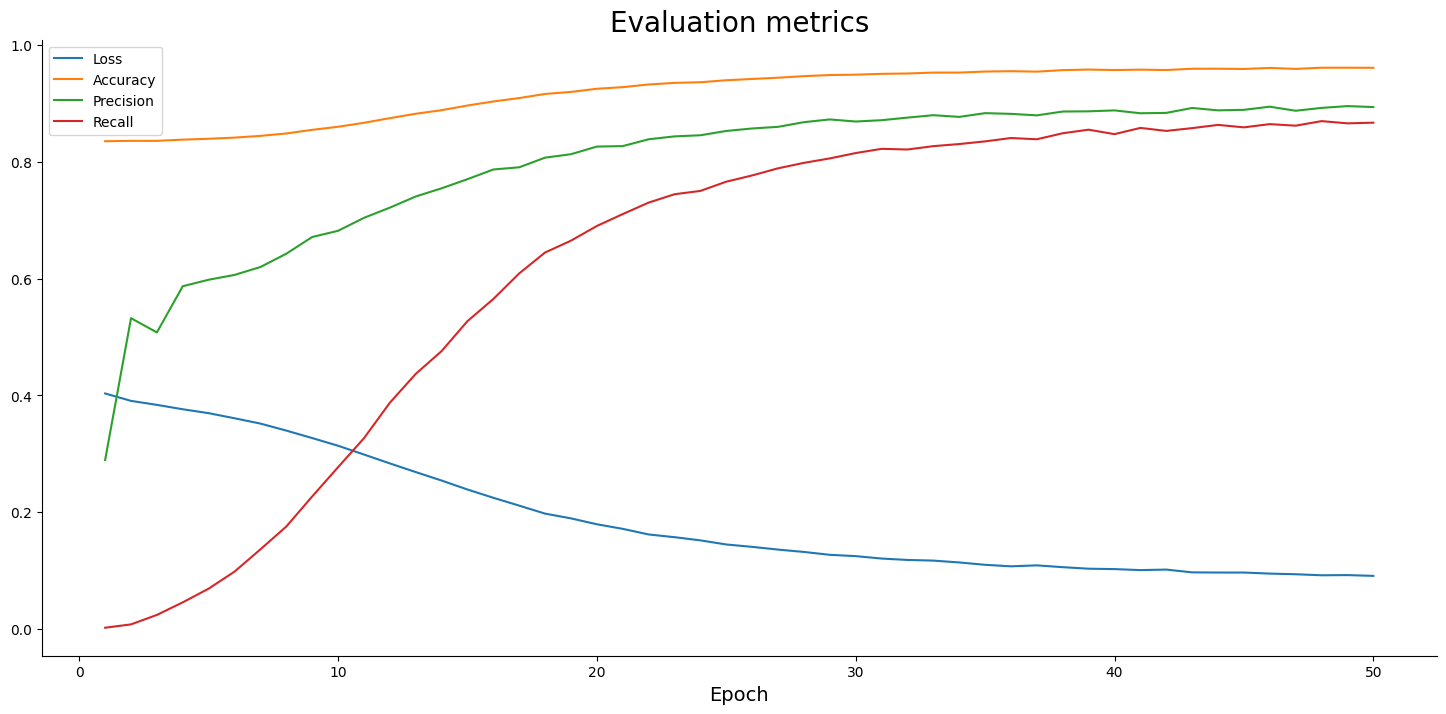

In [ ]:
import numpy as np
plt.plot(
    np.arange(1, 51), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 51), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 51), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 51), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
predictions = model.predict(X_test_scaled)


250/250 [==============================] - 0s 992us/step


In [ ]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[6367  318]
 [ 475  840]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.90
Precision: 0.73
Recall: 0.64
